In [24]:
# /bin/env/python
from calendar import c
from ctypes import c_char_p
from email import message_from_file
import imp
from tkinter import messagebox
from turtle import color, title
from typing import List
from IPython.display import display
from re import A, U
from sys import displayhook
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
import qutip
print("conda activate")
from qutip import mesolve as mesolve
from qutip import basis as basis
print("import succesful")
from qutip import tensor as tensor
from qutip import dag as dag
from qutip import steadystate as steadystate

import math
from qutip.qobj import *
from qutip.states import *
from qutip.operators import *
from qutip import *
from qutip import ptrace
from qutip import variance as variance
from Loup_for_different_coupling import Diverse_Loups as Diverse_Loups
import multiprocessing as mp
import csv
from numpy import log as ln
import matplotlib.pyplot as plt
from IPython.display import display, Latex
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

conda activate
import succesful


1.0986122886681098
dfjk 30
D lösig isch: -1.6013136130503964j         und        Quantum object: dims = [[3, 30], [3, 30]], shape = (90, 90), type = oper, isherm = False
Qobj data =
[[0.00000000e+00+2.71439360e-06j 1.65863710e-05+0.00000000e+00j
  0.00000000e+00-9.92178508e-06j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [4.40408899e-07+0.00000000e+00j 0.00000000e+00+1.10692829e-05j
  6.09922314e-05+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+3.91285726e-07j 4.55196524e-06+0.00000000e+00j
  0.00000000e+00+1.81269654e-05j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 ...
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00-1.09852109e-03j
  1.20586577e-03+0.00000000e+00j 0.00000000e+00+2.01653877e-05j]
 [0.00000000e+00+0.000000

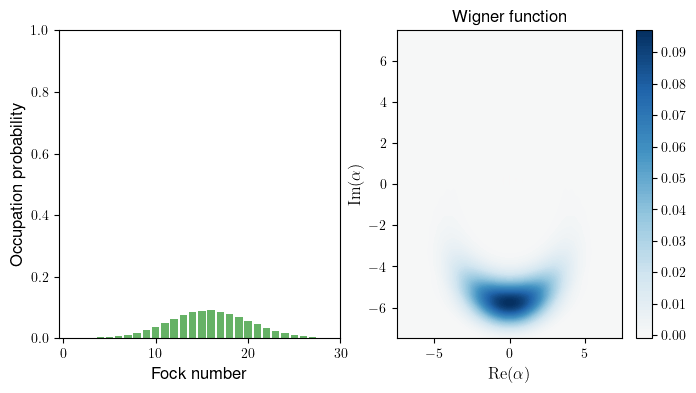

In [25]:
omega_1=0
omega_2=30
omega_3=150

omega_f= omega_2 - omega_1
omega_h=omega_3-omega_1  # frequency of the atomic transition that is coupled to the hot bath
omega_c=omega_3-omega_2
print(ln(3))
omega_d=30

h=1
nph=30    # Maximale Photonen im cavity 
 
Th=100.    # temperature of the hot bath
Tc=20.     # temperature of the cold bath
Tenv=0.0000000000000000000000000001



nh=5
nc=0.02

nf=0.02    #Beschreibt den cavity/Photonen. 

f =0.03

gamma_h=1
gamma_c=1
kappa=0.028
kb=1
g=14*kappa
#g=0

b_fock=qutip.states.fock(nph,0) #m)/fock(N,#m)
b_atom=basis(3)
b_comp=tensor( b_atom, b_fock)

#rho2=tensor(basis(6,4),basis(6,4).dag())


# hier ist ein wenig gebastel mit den transitionsoperatoren

va=qutip.Qobj(qutip.qutrit_basis()[2])
vb=qutip.Qobj(qutip.qutrit_basis()[1])
vg=qutip.Qobj(qutip.qutrit_basis()[0])

Trans_13=tensor(vg*va.dag(),qutip.identity(nph))
Trans_23=tensor(vb*va.dag(),qutip.identity(nph))
Trans_12=tensor(vg*vb.dag(),qutip.identity(nph))

proj_1=tensor(vg*vg.dag(),qutip.identity(nph))
proj_2=tensor(vb*vb.dag(),qutip.identity(nph))
proj_3=tensor(va*va.dag(),qutip.identity(nph))

a=qutip.tensor(qutip.identity(3),qutip.destroy(nph))

H_free=omega_1*proj_1+h*omega_2*proj_2+h*omega_3*proj_3+h*omega_f*a.dag()*a

H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

V=f*a.dag()+f*a #das got glaub nid

H=H_free+H_int




#Hdilde=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 

Hdilde=H_int+V +(omega_2-(omega_1+omega_d))*(proj_2)+(omega_f-omega_d)*(a.dag()*a)   
print("dfjk",omega_d)
########################################################################################################
A1=Trans_13
A2=Trans_13.dag()
A3=Trans_23
A4=Trans_23.dag()
A5=a
A6=a.dag()


gamma_1=(nh+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
gamma_2=(nh)*gamma_h
gamma_3=(nc+1)*gamma_c
gamma_4=(nc)*gamma_c
kappa_5=(nf+1)*kappa ####goes to zero
kappa_6=(nf)*kappa

A1=Trans_13
A2=Trans_13.dag()
A3=Trans_23
A4=Trans_23.dag()
A5=a
A6=a.dag()
########################################################################################################
c_op_list=[]

c_op_list.append(np.sqrt(gamma_1)*A1)
c_op_list.append(np.sqrt(gamma_2)*A2)
c_op_list.append(np.sqrt(gamma_3)*A3)
c_op_list.append(np.sqrt(gamma_4)*A4)
c_op_list.append(np.sqrt(kappa_5)*A5)
c_op_list.append(np.sqrt(kappa_6)*A6)

def DichteMatrix(nh, nc, nf, Hami):
    gamma_1=(nh+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
    gamma_2=(nh)*gamma_h
    gamma_3=(nc+1)*gamma_c
    gamma_4=(nc)*gamma_c
    kappa_5=(nf+1)*kappa ####goes to zero
    kappa_6=(nf)*kappa

    A1=Trans_13
    A2=Trans_13.dag()
    A3=Trans_23
    A4=Trans_23.dag()
    A5=a
    A6=a.dag()
########################################################################################################
    c_op_list=[]

    c_op_list.append(np.sqrt(gamma_1)*A1)
    c_op_list.append(np.sqrt(gamma_2)*A2)
    c_op_list.append(np.sqrt(gamma_3)*A3)
    c_op_list.append(np.sqrt(gamma_4)*A4)
    c_op_list.append(np.sqrt(kappa_5)*A5)
    c_op_list.append(np.sqrt(kappa_6)*A6)
    rho = steadystate(Hami, c_op_list)
    return rho

rho = DichteMatrix(nh,nc,nf,Hdilde)

#print(c_op_list)


#print(rho)
#qutip.plot_wigner_fock_distribution(rho)
#plt.show()

print("D lösig isch:",np.trace((a*(c_op_list[4]*rho*c_op_list[4].dag()-1/2*(c_op_list[4].dag()*c_op_list[4]*rho-rho*c_op_list[4].dag()*c_op_list[4]))))-np.trace(a*a.dag()*a),"        und       ",a*(c_op_list[4]*rho*c_op_list[4].dag()-1/2*(c_op_list[4].dag()*c_op_list[4]*rho-rho*c_op_list[4].dag()*c_op_list[4])))

rho_f=rho.ptrace(1)  ### State in the cavity
print(rho)
qutip.plot_wigner_fock_distribution(rho_f,colorbar='colorbar')
plt.show()

In [43]:
# /bin/env/python
from calendar import c
from ctypes import c_char_p
from email import message_from_file
import imp
from tkinter import messagebox
from IPython.display import display
from re import A, U
from sys import displayhook
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
import qutip
print("conda activate")
from qutip import mesolve as mesolve
from qutip import basis as basis
print("import succesful")
from qutip import tensor as tensor
from qutip import dag as dag
from qutip import steadystate as steadystate
from qutip import *
from qutip import ptrace 
#from qutip import eigenstates as eigenstates


class Diverse_Loups():
    def EnergieCalculator(g,H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list):

        

        H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

        H=H_free+H_int
        
        
        rho = steadystate(H, c_op_list) ######## Are you sure its with only photons H_free?
        rho_f=rho.ptrace(1)

        def D(c_op_list,rho):
            D=[]
            for i in range(6):
                D.append(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho-rho*c_op_list[i].dag()*c_op_list[i]))
            return D

        Liste_von_Q=[] # ExpectValue for Thermal Energy

        Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[0]+D(c_op_list,rho)[1])))
        Liste_von_Q.append(-1*np.trace(H_free*(D(c_op_list,rho)[2]+D(c_op_list,rho)[3])))
        Liste_von_Q.append(-1*np.trace(H_free*(D(c_op_list,rho)[4]+D(c_op_list,rho)[5])))
        #Liste_von_Q.append(g)  g in der liste anfügen

        float_list= list(np.float_(Liste_von_Q))
        print(float_list)    
        Liste_von_Q=float_list

        return(Liste_von_Q)




    def Funktion(nh,proj_1,proj_2,proj_3,H,nc,nf,gamma_h,gamma_c,kappa,A1,A2,A3,A4,A5,A6):
        nh_list=[]
        Trace_list=[]
        
        

        gamma_1=(nh+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
        gamma_2=(nh)*gamma_h
        gamma_3=(nc+1)*gamma_c
        gamma_4=(nc)*gamma_c
        kappa_5=(nf+1)*kappa ####goes to zero
        kappa_6=(nf)*kappa

        c_op_list=[]    
        c_op_list.append(np.sqrt(gamma_1)*A1)
        c_op_list.append(np.sqrt(gamma_2)*A2)
        c_op_list.append(np.sqrt(gamma_3)*A3)
        c_op_list.append(np.sqrt(gamma_4)*A4)
        c_op_list.append(np.sqrt(kappa_5)*A5)
        c_op_list.append(np.sqrt(kappa_6)*A6)
            

        rho = steadystate(H, c_op_list)
        Trace_list.append(np.trace(proj_1*rho))
        Trace_list.append(np.trace(proj_2*rho))
        Trace_list.append(np.trace(proj_3*rho))
        

        float_list2= list(np.float_(Trace_list))
        #print(float_list)    
        Trace_list=float_list2

        return Trace_list
            

        #A1=Trans_13
        #A2=Trans_13.dag()
        #A3=Trans_23
        #A4=Trans_23.dag()
        #A5=a
        #A6=a.dag()
        #c_op_list=[]
        



        #gamma_1=(nh+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
        #gamma_2=(nh)*gamma_h
        #gamma_3=(nc+1)*gamma_c
        #gamma_4=(nc)*gamma_c
        #gamma_5=(nf+1)*gamma_f ####goes to zero
        #gamma_6=(nf)*gamma_f


        #c_op_list.append(np.sqrt(gamma_1)*A1)
        #c_op_list.append(np.sqrt(gamma_2)*A2)
        #c_op_list.append(np.sqrt(gamma_3)*A3)
        #c_op_list.append(np.sqrt(gamma_4)*A4)
        #c_op_list.append(np.sqrt(gamma_5)*A5)
        #c_op_list.append(np.sqrt(gamma_6)*A6)

       
    def Entropy(nh,Trans_12,a, kb,h,g,H,H_free,nc,nf,gamma_h,gamma_c,kappa,Trans_13,Trans_23,omega_c,omega_h,omega_f):
        A1=Trans_13
        A2=Trans_13.dag()
        A3=Trans_23
        A4=Trans_23.dag()
        A5=a
        A6=a.dag()
        
        H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

        H=H_free+H_int
        
        
        
        
        gamma_1=(nh+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
        gamma_2=(nh)*gamma_h
        gamma_3=(nc+1)*gamma_c
        gamma_4=(nc)*gamma_c
        kappa_5=(nf+1)*kappa ####goes to zero
        kappa_6=(nf)*kappa
        
        c_op_list=[]    
        c_op_list.append(np.sqrt(gamma_1)*A1)
        c_op_list.append(np.sqrt(gamma_2)*A2)
        c_op_list.append(np.sqrt(gamma_3)*A3)
        c_op_list.append(np.sqrt(gamma_4)*A4)
        c_op_list.append(np.sqrt(kappa_5)*A5)
        c_op_list.append(np.sqrt(kappa_6)*A6)
        def T(n,omega):
            
            T=h*omega/(kb*(np.log((1/n)+1)))
            return T

        rho = steadystate(H, c_op_list) ######## Are you sure its with only photons H_free?
        rho_f=rho.ptrace(1)
        def D(c_op_list,rho):
            D=[]
            for i in range(6):
                D.append(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho+rho*c_op_list[i].dag()*c_op_list[i]))
            return D

        Liste_von_Q=[] # ExpectValue for Thermal Energy
        Liste_von_Q_f=[]
        Liste_von_Q_c=[]
        Liste_von_Q_h=[]
        #Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[0]+D(c_op_list,rho)[1]))/(T(nh,omega_h))+np.trace(H_free*(D(c_op_list,rho)[2]+D(c_op_list,rho)[3]))/T(nc,omega_c)+np.trace(H_free*(D(c_op_list,rho)[4]+D(c_op_list,rho)[5]))/T(nf,omega_f))
        Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[0]+D(c_op_list,rho)[1]))+np.trace(H_free*(D(c_op_list,rho)[2]+D(c_op_list,rho)[3]))+np.trace(H_free*(D(c_op_list,rho)[4]+D(c_op_list,rho)[5])))
        Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[0]+D(c_op_list,rho)[1])))#/(T(nh,omega_h)))#liste_von_Q_h
        Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[2]+D(c_op_list,rho)[3])))#/(T(nc,omega_c)))
        Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[4]+D(c_op_list,rho)[5])))#/(T(nf,omega_f)))
            #Liste_von_Q.append(g)  g in der liste anfügen

        float_list= list(np.float_(Liste_von_Q))
        print(float_list)    
        Liste_von_Entropy=float_list

        return(Liste_von_Entropy)

    def Photonnumber(nh2,a,proj_1,proj_2,proj_3,H,nc,nf,gamma_h,gamma_c,kappa,A1,A2,A3,A4,A5,A6):
        
        Trace_list=[]
        
        

        gamma_1=(nh2+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
        gamma_2=(nh2)*gamma_h
        gamma_3=(nc+1)*gamma_c
        gamma_4=(nc)*gamma_c
        kappa_5=(nf+1)*kappa ####goes to zero
        kappa_6=(nf)*kappa

        c_op_list=[]    
        c_op_list.append(np.sqrt(gamma_1)*A1)
        c_op_list.append(np.sqrt(gamma_2)*A2)
        c_op_list.append(np.sqrt(gamma_3)*A3)
        c_op_list.append(np.sqrt(gamma_4)*A4)
        c_op_list.append(np.sqrt(kappa_5)*A5)
        c_op_list.append(np.sqrt(kappa_6)*A6)
            

        rho = steadystate(H, c_op_list)
        Trace_list.append

        n=np.trace(a.dag()*a*rho)
        float_list2= list(np.float_(Trace_list))
        #print(float_list)    
        Trace_list=float_list2



        return n 
    
    def EnergieCalculator_mit_faktor(g,H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,omega_d,proj_2,f,omega_f,omega_2):

        gamma_1=(nh+1)*gamma_h #### unsicher wegen vorfaktor 1/2 
        gamma_2=(nh)*gamma_h
        gamma_3=(nc+1)*gamma_c
        gamma_4=(nc)*gamma_c
        kappa_5=(nf+1)*kappa ####goes to zero
        kappa_6=(nf)*kappa

        A1=Trans_13
        A2=Trans_13.dag()
        A3=Trans_23
        A4=Trans_23.dag()
        A5=a
        A6=a.dag()
########################################################################################################
        c_op_list=[]

        c_op_list.append(np.sqrt(gamma_1)*A1)
        c_op_list.append(np.sqrt(gamma_2)*A2)
        c_op_list.append(np.sqrt(gamma_3)*A3)
        c_op_list.append(np.sqrt(gamma_4)*A4)
        c_op_list.append(np.sqrt(kappa_5)*A5)
        c_op_list.append(np.sqrt(kappa_6)*A6)

        omega_1=0
        V=f*a.dag()+f*a
        H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())
        
        H=H_free+H_int -omega_d*(a.dag()*a+proj_2) #+ f*(a+a.dag()) 
        H_free1=H_free 
        Hdilde=H_int+V +(omega_2-(30+omega_d))*(a.dag()*a)+(omega_f-omega_d)*proj_2   
        rho = steadystate(Hdilde, c_op_list) ######## Are you sure its with only photons H_free?
        rho_f=rho.ptrace(1)

        def D(c_op_list,rho):
            D=[]
            for i in range(6):
                D.append(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho+rho*c_op_list[i].dag()*c_op_list[i]))
            return D

        Liste_von_Q=[] # ExpectValue for Thermal Energy

        Liste_von_Q.append(np.trace(H_free1*(D(c_op_list,rho)[0]+D(c_op_list,rho)[1])))
        Liste_von_Q.append(np.trace(H_free1*(D(c_op_list,rho)[2]+D(c_op_list,rho)[3])))
        Liste_von_Q.append(np.trace(H_free1*(D(c_op_list,rho)[4]+D(c_op_list,rho)[5])))
        #Liste_von_Q.append(g)  g in der liste anfügen

        float_list= list(np.float_(Liste_von_Q))
        print(float_list)    
        Liste_von_Q=float_list

        return(Liste_von_Q)
    





    def P(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,f,omega_2):
      
        def Ptr(H_free,Hdilde,rho):
                Power=0
                Power=-1j*np.trace(H_free*Hdilde*rho-H_free*rho*Hdilde)
                return Power
                #dt_rho=dt_rho+(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho-rho*c_op_list[i].dag()*c_op_list[i]))
        P_list=[]
        g=0
        for i in range(200):
            g=g+i/100
            H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

            H=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 
        
            V=f*a.dag()+f*a
            Hdilde=H_int+V +(30-(30+omega_d))*(a.dag()*a)+(omega_f-omega_d)*proj_2  
            rho = steadystate(Hdilde, c_op_list) ######## Are you sure its with only photons H_free?
        
            P_list.append(Ptr(H_free,Hdilde,rho))

        return(P_list)

    
    def P2(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,f,omega_2,g):

          
            H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

            H=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 
        
            V=f*a.dag()+f*a
            Hdilde=H_int+V +(30-(30+omega_d))*(a.dag()*a)+(omega_f-omega_d)*proj_2  
            rho = steadystate(Hdilde, c_op_list) ######## Are you sure its with only photons H_free?
            Power=-1j*np.trace((H_free*Hdilde-Hdilde*H_free)*rho)
            

            return(Power)
    

    def Fullcounting(c_op_list):
        x=c_op_list.qutip.eigenstates()

        return x

    def current(H_free, Trans_12, a, h,c_op_list,omega_d,omega_f ,proj_2,g,f,anzahl):
      
        def D(c_op_list,rho):
            D=[]
            for i in range(6):
                D.append(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho+rho*c_op_list[i].dag()*c_op_list[i]))
            return D
        
        
        float_list=[]
        for i in range(anzahl):
            f=f+1/80
            H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

            H=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 
        
            V=f*a.dag()+f*a
            Hdilde=H_int+V +(30-(30+omega_d))*(a.dag()*a)+(omega_f-omega_d)*proj_2  
            rho = steadystate(Hdilde, c_op_list)
            Liste_von_Q=[]
            Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[0]+D(c_op_list,rho)[1])))
            Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[2]+D(c_op_list,rho)[3])))
            Liste_von_Q.append(np.trace(H_free*(D(c_op_list,rho)[4]+D(c_op_list,rho)[5])))
            float_list.append(list(np.float_(Liste_von_Q)))
            print(Liste_von_Q)
        
        #Liste_von_Q.append(g)  g in der liste anfügen

        
           
        Liste_von_Q=float_list

        return(Liste_von_Q)
    


    def P3(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,omega_2,g,f,anzahl):
      
        def Ptr(H_free,Hdilde,rho):
                Power=0
                Power=-1j*np.trace(H_free*Hdilde*rho-H_free*rho*Hdilde)
                return Power
                #dt_rho=dt_rho+(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho-rho*c_op_list[i].dag()*c_op_list[i]))
        P_list=[]
        
        for i in range(anzahl):
            f=f+1/80
            H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

            H=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 
        
            
            Hdilde=H_int+f*(a+a.dag()) +30*(a.dag()*a)#+(omega_f-omega_d)*proj_2  
            rho = steadystate(Hdilde, c_op_list) 
        
            P_list.append(Ptr(H_free,Hdilde,rho))

        return(P_list)
    


    
    def P4(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,omega_2,g,f,anzahl):
      
        def Ptr(H_free,Hdilde,rho):
                Power=0
                Power=-1j*np.trace(H_free*Hdilde*rho-H_free*rho*Hdilde)
                return Power
                #dt_rho=dt_rho+(c_op_list[i]*rho*c_op_list[i].dag()-1/2*(c_op_list[i].dag()*c_op_list[i]*rho-rho*c_op_list[i].dag()*c_op_list[i]))
        P_list=[]
        
        for i in range(anzahl):
            g=g+1/120
            H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

            H=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 
        
            
            Hdilde=H_int+f*(a+a.dag()) +30*(a.dag()*a)#+(omega_f-omega_d)*proj_2  
            rho = steadystate(Hdilde, c_op_list) 
        
            P_list.append(Ptr(H_free,Hdilde,rho))

        return(P_list)
    
    

conda activate
import succesful


In [27]:
L_List=[A1,A3,A5]
Lt_list=[A2,A4,A6]
Mk_List=[]
Mkt_List=[]
for i in range (2):
    Mk_List.append(qutip.superop_reps.to_kraus(L_List[i], tol=1e-09))
    Mkt_List.append(qutip.superop_reps.to_kraus(Lt_list[i], tol=1e-09))


print(np.vdot(Mk_List[1],Mkt_List[1])*rho)
#do weiss i noni gnau welli liste öb mk mit superop to kraus oder ni
def CalculateK(Mk_List,Mkt_List,rho):
    K=0.0
    k=1
    for i in range (2):
        if i==0:
            vk=1/(np.sqrt(2*k))
        else:
            vk=1/np.sqrt(k)

        K=K+np.trace(np.vdot(Mk_List[i],Mkt_List[i])*rho) #vk² muess no  dezue
        
    return K

def CalculateJ(Mk_List,Mkt_List,rho):
    J=0.0
    k=1
    for i in range (2):
        if i==0:
            vk=1/(np.sqrt(2*k))
        else:
            vk=1/np.sqrt(k)
            
        J=J+ 2*vk*np.trace(np.vdot(Mk_List[i],Mkt_List[i])*rho) #2*vk muess no dezue
        
    return 2*J

print("mis k  sött " ,CalculateK(Mk_List,Mkt_List,rho),"print j",CalculateJ(Mk_List,Mkt_List,rho))

print(np.trace(rho))


Quantum object: dims = [[3, 30], [3, 30]], shape = (90, 90), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
mis k  sött  0j print j 0j
(0.9999999999999998+0j)


liste von P [(8.365025217811199e-07+1.0044374864925441e-10j), (8.26014474181086e-07+1.0847307432548283e-10j), (8.08533456953574e-07+1.209965930027841e-10j), (7.840609807125954e-07+1.4114640029860317e-10j), (7.525990187377947e-07+1.6977143021767034e-10j), (7.141457352434563e-07+2.0825040363203052e-10j), (6.687056482341388e-07+2.6110351967948646e-10j), (6.162795304446678e-07+3.344969610979946e-10j), (5.568695063594313e-07+4.3349443954117413e-10j), (4.904776677963994e-07+3.2092726541245165e-10j), (4.171068330883197e-07+1.498507789430947e-10j), (3.3675834779800635e-07+1.9135196920274622e-10j), (2.494393819051141e-07+2.472962270041787e-10j), (1.5515118370195223e-07+3.229895083715517e-10j), (5.3894727445353045e-08+8.202705671923299e-11j), (-5.432250318872372e-08+1.1504463480387303e-10j), (-1.694972018377736e-07+1.6281549041224705e-10j), (-2.91624620643168e-07+2.295242911983664e-10j), (-4.206999964620742e-07+3.2526994527176173e-10j), (-5.567180216511235e-07+4.5958016591734836e-10j), (-6.99673

/home/sander/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


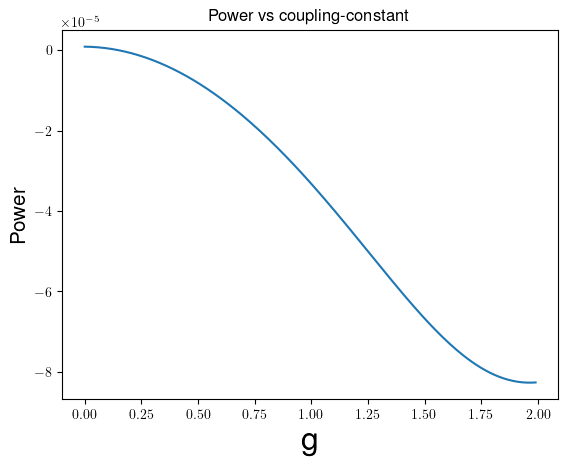

TypeError: P2() missing 1 required positional argument: 'anzahl'

In [28]:
g_list=[]

Energie_VS_g=[]
for i in range(200):
    #list_temp=[]
    #list_temp=Diverse_Loups.EnergieCalculator(g,H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,omega_2,V,omega_1,omega_d,proj_2,omega_f,c_op_list)
    g_list.append(i/100)  #Erstellt eine Liste mit Wären von g 
    #Energie_VS_g.append(list_temp)

"""
fig, ax = plt.subplots()
ax.set_xlabel(r' $\frac{g}{\gamma_h}$', fontsize=23)
ax.set_ylabel(r' Heat current', fontsize=15)
plt.title('current/energy flux vs coupling constant')
plt.plot(np.asarray(g_list)[:200],np.asarray(Energie_VS_g)[:200,0],label=r' $\frac{J_h}{\gamma_h \omega_h}$')
plt.plot(np.asarray(g_list)[:200],np.asarray(Energie_VS_g)[:200,1],label=r' $\frac{J_c}{\gamma_c \omega_c}$')
plt.plot(np.asarray(g_list)[:200],np.asarray(Energie_VS_g)[:200,2],label=r' $\frac{J_{cav}}{\gamma_{cav} \omega_{cav}}$')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')
plt.show()
"""

P_list=Diverse_Loups.P(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,f,omega_2)
print("liste von P",P_list)
PowerPlot, ax = plt.subplots() 
ax.set_xlabel(r' g', fontsize=23)
ax.set_ylabel(r' Power', fontsize=15)
plt.title("Power vs  coupling-constant")
plt.plot(np.asarray(g_list)[:200],np.asarray(P_list)[:200],label=r' Kurve')


plt.show()

g=0
g_li=[]
P_li=[]
for i in range(200):
    g=g+i/100
    H_int=h*g*(Trans_12*a.dag()+a*Trans_12.dag())

    H=H_free+H_int -omega_d*(a.dag()*a+proj_2) + f*(a+a.dag()) 
        
    V=f*a.dag()+f*a
    Hdilde=H_int+V +(30-(30+omega_d))*(a.dag()*a)+(omega_f-omega_d)*proj_2  
    rho = steadystate(Hdilde, c_op_list) ######## Are you sure its with only photons H_free?
        
    g_li.append(g)
    P_li.append(Diverse_Loups.P2(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,f,omega_2,g))

    print(P_li)





PowerPlot2, ax = plt.subplots() 
ax.set_xlabel(r' g', fontsize=23)
ax.set_ylabel(r' Power', fontsize=15)
plt.plot(np.asarray(g_li)[:200],np.asarray(P_li)[:200],label=r' Kurve')
plt.show()


In [ ]:
#Entropy. production
def T(omega,n):
    T=h*omega/(kb*(np.log((1/n)+1)))
    return T



nh_list=[]
Trace_list=[]
nh=0.1 #set nh again to zero
for j in range(100):
    Trace_list_temp=Diverse_Loups.Funktion(nh,proj_1,proj_2,proj_3,H,nc,nf,gamma_h,gamma_c,kappa,A1,A2,A3,A4,A5,A6)
    Trace_list.append(Trace_list_temp)

    nh_list.append(nh)
    nh=nh+0.3

nh2=0.1
nh_list2=[]
Entropy=[]
for i in range(100):
    list_temp=[]
    list_temp=Diverse_Loups.Entropy(nh2,Trans_12,a, kb,h,g,H,H_free,nc,nf,gamma_h,gamma_c,kappa,Trans_13,Trans_23,omega_c,omega_h,omega_f)
    #g_list.append(i/100)  #Erstellt eine Liste mit Wären von g 
    Entropy.append(list_temp)
    nh2=nh2+0.3
    nh_list2.append(nh2)

#Liste von Stings in floats konvertieren
#float_list2=list(np.float_(Energie_VS_g))
print(Entropy) 

#result=mesolve(H, rho0, tlist)
#print(D(c_op_list,rho)[3])


print("Die Temperatur des warmen Bades ist: ",T(omega_h,nh))
print("Die Temperatur des kalten Bades ist: ",T(omega_c,nc))
print(Trace_list_temp)

fig3, ax = plt.subplots()

ax.set_xlabel(r' $n_h$', fontsize=19)
ax.set_ylabel('Entropy production rate')
plt.title(r' Entropy Production  rate vs $n_h$ ')
plt.plot(np.asarray(nh_list2)[:100],np.asarray(Entropy)[:100,0],label=r' $\frac{J_h}{T_h}+\frac{J_{cav}}{T_{cav}}+\frac{J_c}{T_c}$',color='red')
plt.plot(np.asarray(nh_list2)[:100],np.asarray(Entropy)[:100,1],label=r' $\frac{J_h}{T_h}$',color='green')
plt.plot(np.asarray(nh_list2)[:100],np.asarray(Entropy)[:100,2],label=r' $\frac{J_c}{T_c}$',color='pink')
plt.plot(np.asarray(nh_list2)[:100],np.asarray(Entropy)[:100,3],label=r' $\frac{J_{cav}}{T_{cav}}$',color='orange')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')
#Linien in plt
"""plt.axvline(x=2.6)
plt.axvline(x=2.6)
plt.axvline(x=5.5)
plt.axvline(x=0.17)
plt.axvline(x=20)
plt.axvline(x=1.7)"""

plt.show()

liste von P [(-4.491846706944613e-07-1.6997782438665338e-10j), (-1.7967382613761289e-06-1.6999696896348223e-10j), (-4.042659052971218e-06-1.7002887866677537e-10j), (-7.186946681740144e-06-1.7007355660959734e-10j), (-1.122959401501054e-05-1.7013100715063944e-10j), (-1.6170597473265828e-05-1.7020123589462363e-10j), (-2.2009951087129065e-05-1.7028424969280936e-10j), (-2.874764810682449e-05-1.7038005664362713e-10j), (-3.638367952567646e-05-1.7048866609342234e-10j), (-4.4918036948140584e-05-1.7061008863731153e-10j), (-5.4350709431261586e-05-1.7074433612015736e-10j), (-6.468168624073261e-05-1.7089142163765288e-10j), (-7.59109545935191e-05-1.7105135953752606e-10j), (-8.803850092342213e-05-1.7122416542085791e-10j), (-0.00010106431057911954-1.7140985614351098e-10j), (-0.00011498836782414217-1.7160844981767927e-10j), (-0.0001298106558369644-1.7181996581354987e-10j), (-0.00014553115881228923-1.7204442476108028e-10j), (-0.00016214985311105852-1.722818485518922e-10j), (-0.00017966672182772363-1.725

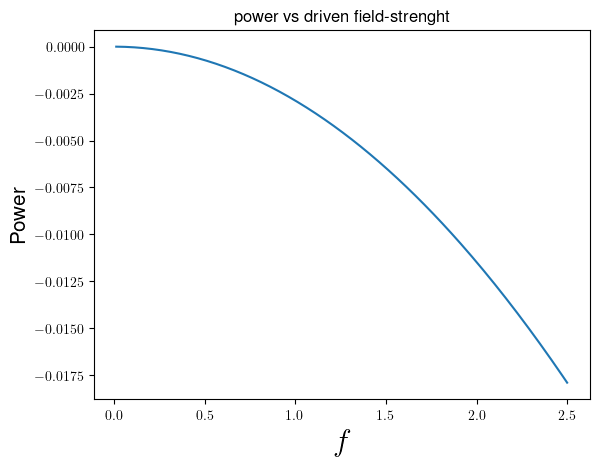

[(0.12850609606052243+0j), (-0.10280487688145862+0j), (-0.02570077000887183+0j)]
[(0.1285150040582342+0j), (-0.10281200327963048+0j), (-0.02570120405440559+0j)]


/tmp/ipykernel_7496/1401011169.py:348: ComplexWarning: Casting complex values to real discards the imaginary part
  float_list.append(list(np.float_(Liste_von_Q)))


[(0.1285298507120613+0j), (-0.10282388060269608+0j), (-0.025701927463631855+0j)]
[(0.12855063600845834+0j), (-0.1028405088398226+0j), (-0.025702940236556247+0j)]
[(0.1285773599284763+0j), (-0.10286188797584503+0j), (-0.025704242373186158+0j)]
[(0.12861002244773628+0j), (-0.10288801799126604+0j), (-0.02570583387353123+0j)]
[(0.12864862353645784+0j), (-0.1029188988622548+0j), (-0.02570771473760328+0j)]
[(0.12869316315943186+0j), (-0.10295453056064861+0j), (-0.025709884965416346+0j)]
[(0.12874364127604093+0j), (-0.10299491305395173+0j), (-0.025712344556986375+0j)]
[(0.12880005784024534+0j), (-0.10304004630533681+0j), (-0.02571509351233168+0j)]
[(0.12886241280059896+0j), (-0.10308993027364047+0j), (-0.025718131831472296+0j)]
[(0.12893070610023905+0j), (-0.10314456491337243+0j), (-0.02572145951443124+0j)]
[(0.1290049376768761+0j), (-0.10320395017470602+0j), (-0.025725076561232855+0j)]
[(0.12908510746281598+0j), (-0.10326808600348446+0j), (-0.02572898297190395+0j)]
[(0.12917121538494247+0j),

[(0.1624694732823807+0j), (-0.12997557867119341+0j), (-0.027357099458529835+0j)]
[(0.16310676008460914+0j), (-0.1304854081132242+0j), (-0.027388206498300354+0j)]
[(0.16374995403715137+0j), (-0.13099996327551128+0j), (-0.027419602914233576+0j)]
[(0.16439905455499115+0j), (-0.1315192436900359+0j), (-0.02745128870656126+0j)]
[(0.16505406104776515+0j), (-0.1320432488845092+0j), (-0.027483263875516917+0j)]
[(0.1657149729197649+0j), (-0.13257197838236456+0j), (-0.027515528421336474+0j)]
[(0.1663817895699389+0j), (-0.13310543170276642+0j), (-0.02754808234425769+0j)]
[(0.16705451039190566+0j), (-0.13364360836060604+0j), (-0.027580925644520565+0j)]
[(0.16773313477394444+0j), (-0.13418650786650557+0j), (-0.027614058322367553+0j)]
[(0.1684176620989915+0j), (-0.13473412972681534+0j), (-0.027647480378042266+0j)]
[(0.1691080917446663+0j), (-0.13528647344362443+0j), (-0.02768119181179149+0j)]
[(0.169804423083225+0j), (-0.13584353851474776+0j), (-0.027715192623863537+0j)]
[(0.17050665548161104+0j), (-

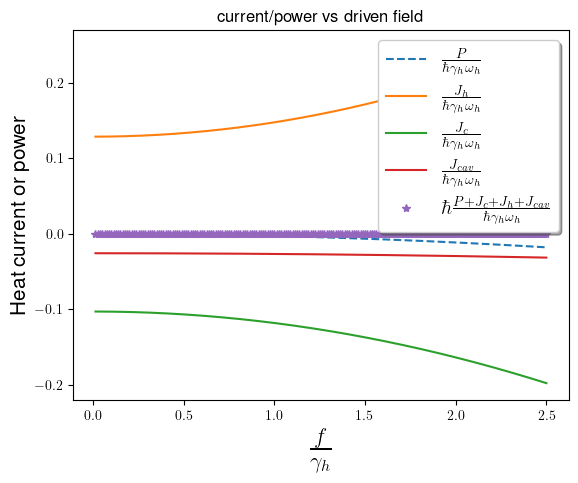

[0.0125, 0.025, 0.037500000000000006, 0.05, 0.0625, 0.075, 0.0875, 0.09999999999999999, 0.11249999999999999, 0.12499999999999999, 0.13749999999999998, 0.15, 0.1625, 0.17500000000000002, 0.18750000000000003, 0.20000000000000004, 0.21250000000000005, 0.22500000000000006, 0.23750000000000007, 0.25000000000000006, 0.26250000000000007, 0.2750000000000001, 0.2875000000000001, 0.3000000000000001, 0.3125000000000001, 0.3250000000000001, 0.33750000000000013, 0.35000000000000014, 0.36250000000000016, 0.37500000000000017, 0.3875000000000002, 0.4000000000000002, 0.4125000000000002, 0.4250000000000002, 0.4375000000000002, 0.45000000000000023, 0.46250000000000024, 0.47500000000000026, 0.48750000000000027, 0.5000000000000002, 0.5125000000000002, 0.5250000000000001, 0.5375000000000001, 0.55, 0.5625, 0.575, 0.5874999999999999, 0.5999999999999999, 0.6124999999999998, 0.6249999999999998, 0.6374999999999997, 0.6499999999999997, 0.6624999999999996, 0.6749999999999996, 0.6874999999999996, 0.6999999999999995

In [45]:
g=14*kappa
f=0
f1=f
f_list=[]
for i in range(200):
    f1=f1+1/80
    f_list.append(f1)


anzahl=200 #anzahl iterationen im loop

#f against the  power
P_list=Diverse_Loups.P3(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,omega_2,g,f,anzahl)
print("liste von P",P_list)


PowerPlot, ax = plt.subplots() 
ax.set_xlabel(r'$f$', fontsize=23)
ax.set_ylabel(r' Power', fontsize=15)
plt.title('power vs driven field-strenght')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(P_list)[:anzahl],label=r' Kurve')
plt.show()


#f against power


Energie_VS_f=Diverse_Loups.current(H_free, Trans_12, a, h,c_op_list,omega_d,omega_f ,proj_2,g,f,anzahl)

PundJ=[]
Energie_VS_f2=np.array(Energie_VS_f)
P_list2=np.array(P_list)
for i in range(anzahl):
    PundJ.append(Energie_VS_f2[i,0]+Energie_VS_f2[i,1]+Energie_VS_f2[i,2]+P_list2[i])



fig, ax = plt.subplots()
ax.set_xlabel(r' $\frac{f}{\gamma_h}$', fontsize=23)
ax.set_ylabel(r' Heat current or power ', fontsize=15)
plt.title('current/power vs driven field')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(P_list)[:anzahl],'--',label=r'$ \frac{P}{\hbar \gamma_h \omega_{h}}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(Energie_VS_f)[:anzahl,0],label=r' $\frac{J_h}{\hbar \gamma_h \omega_h}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(Energie_VS_f)[:anzahl,1],label=r' $\frac{J_c}{\hbar\gamma_h \omega_h}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(Energie_VS_f)[:anzahl,2],label=r' $\frac{J_{cav}}{\hbar\gamma_h \omega_{h}}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(PundJ)[:anzahl],'*',label=r'$\hbar \frac{P+J_c+J_h+J_{cav}}{\hbar \gamma_h \omega_{h}}$')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('white')
plt.show()


print(f_list)



/tmp/ipykernel_7496/1401011169.py:269: ComplexWarning: Casting complex values to real discards the imaginary part
  float_list= list(np.float_(Liste_von_Q))


[5.747982739081738e-05, -4.598386335367273e-05, -9.534052699112013e-05]
[0.0002299267569410585, -0.00018394128598657938, -0.0001293637068477388]
[0.0005173625488980131, -0.0004138900394327007, -0.00018607387611096153]
[0.0009198237092820019, -0.0007358589680075031, -0.00026547834016422706]
[0.0014373613037269727, -0.001149889043930614, -0.00036758732880361574]
[0.0020700410079924794, -0.0016560328078286525, -0.0004924139984953252]
[0.002817943122943645, -0.00225435450042032, -0.0006399744352751419]
[0.0036811625928550593, -0.0029449300771619527, -0.0008102878572448071]
[0.0046598090270578065, -0.0037278472255548555, -0.0010033762860604594]
[0.005754006724893461, -0.004603205385126063, -0.0012192640956257214]
[0.006963894861456813, -0.005571115770078265, -0.0014579796612222602]
[0.00828962693170302, -0.006631701545593788, -0.0017195534051251719]
[0.009731371612441982, -0.007785097290253292, -0.002004019276054149]
[0.011289312281386913, -0.00903144982550564, -0.0023114140177743344]
[0.01

[1.1465816623854477, -0.917265329954827, -0.22689128394306565]
[1.1677804144323876, -0.9342243316011616, -0.2310934795193253]
[1.1892574520224564, -0.9514059616835738, -0.23535109925299846]
[1.2110158737133139, -0.9688126989072525, -0.23966476472414167]
[1.2330588150109594, -0.9864470520657149, -0.24403510504616083]
[1.2553894493336886, -1.004311559534067, -0.24846275686257277]
[1.27801098737568, -1.0224087899795447, -0.2529483643491202]
[1.3009266772129233, -1.0407413418632254, -0.25749257923774577]
[1.3241398045871378, -1.0593118435000903, -0.2620960606440862]
[1.347653690775022, -1.078122952988617, -0.26675947538970823]
[1.3714716974635872, -1.0971773581207835, -0.2714834975640048]
[1.3955972201201967, -1.1164777761410374, -0.27626880878371285]
[1.4200336925778485, -1.1360269541154406, -0.28111609814696276]
[1.444784585140855, -1.1558276680552058, -0.28602606203900144]
[1.4698534040907196, -1.1758827232040243, -0.29099940420799036]
[1.4952436922584569, -1.1961949538565126, -0.296036

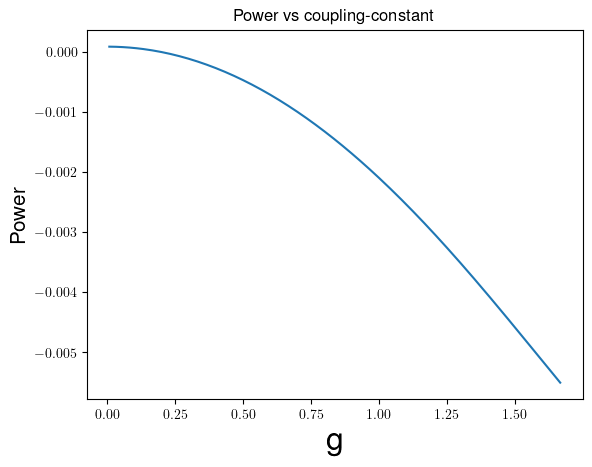

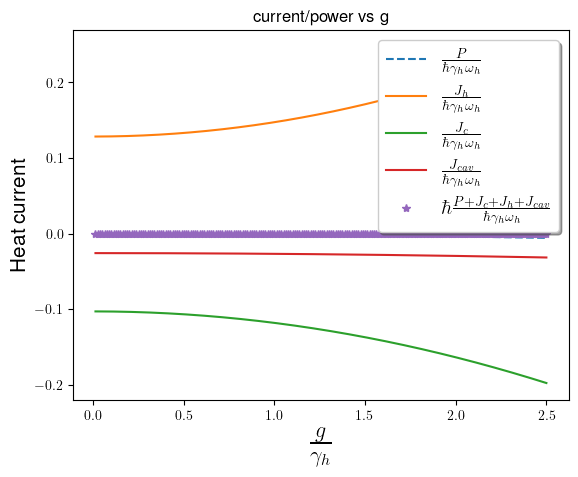

In [50]:
f=0.3
g_list=[]
g=0
Energie_VS_g=[]
for i in range(200):
    g=g+1/120
    list_temp=[]
    list_temp=Diverse_Loups.EnergieCalculator_mit_faktor(g,H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,omega_d,proj_2,f,omega_f,omega_2)
    g_list.append(g)  #Erstellt eine Liste mit Wären von g 
    Energie_VS_g.append(list_temp)

g=0
P_list=Diverse_Loups.P4(H_free, Trans_12, Trans_13, Trans_23, a, nh,nf,nc,h,kb,gamma_h,gamma_c,kappa,c_op_list,omega_d,omega_f ,proj_2,omega_2,g,f,anzahl)
print("liste von P",P_list)
PowerPlot, ax = plt.subplots() 
ax.set_xlabel(r' g', fontsize=23)
ax.set_ylabel(r' Power', fontsize=15)
plt.title("Power vs  coupling-constant")
plt.plot(np.asarray(g_list)[:200],np.asarray(P_list)[:200],label=r' Kurve')

fig, ax = plt.subplots()
ax.set_xlabel(r' $\frac{g}{\gamma_h}$', fontsize=23)
ax.set_ylabel(r' Heat current', fontsize=15)
plt.title('current/power vs g')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(P_list)[:anzahl],'--',label=r'$ \frac{P}{\hbar \gamma_h \omega_{h}}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(Energie_VS_f)[:anzahl,0],label=r' $\frac{J_h}{\hbar \gamma_h \omega_h}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(Energie_VS_f)[:anzahl,1],label=r' $\frac{J_c}{\hbar\gamma_h \omega_h}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(Energie_VS_f)[:anzahl,2],label=r' $\frac{J_{cav}}{\hbar\gamma_h \omega_{h}}$')
plt.plot(np.asarray(f_list)[:anzahl],np.asarray(PundJ)[:anzahl],'*',label=r'$\hbar \frac{P+J_c+J_h+J_{cav}}{\hbar \gamma_h \omega_{h}}$')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('white')
plt.show()




plt.show()